## M-Kopa Data 
M-Kopa is an African connected asset financing platform that provides underbanked customers in Africa access to essential products including solar lighting, televisions, fridges, smartphones & financial services. The process is similar to hire purchase where buyers pay an upfront deposit and pay the rest in specified installments over a given period

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

####  Load libraries 

In [393]:
# let's start by importing libraries we are going to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load our data

In [394]:
filepath = 'KOPA.csv'
df = pd.read_csv(filepath,parse_dates=['StartDate'])


### Get an overview of the data

In [395]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,2014-07-04,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,2015-01-02,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,2012-12-08,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2015-02-20,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,2013-10-28,2000,50,365,3470,4820,13720,Active


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `rental_store_city` column:

### Lets check the statistics of given dataset

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product         9195 non-null   object        
 1   CustomerGender  9195 non-null   object        
 2   Location        9195 non-null   object        
 3   Region          9195 non-null   object        
 4   TotalPrice      9195 non-null   int64         
 5   StartDate       9195 non-null   datetime64[ns]
 6   Deposit         9195 non-null   int64         
 7   DailyRate       9195 non-null   int64         
 8   TotalDays       9195 non-null   int64         
 9   AmountPaid30    9195 non-null   int64         
 10  AmountPaid60    9195 non-null   int64         
 11  AmountPaid360   9195 non-null   int64         
 12  LoanStatus360   9195 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 934.0+ KB


In [397]:
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Numerical Analysis and Visualisation

Let's create a month and year columns and use them to plot sales progress

In [398]:
df['Month'] = pd.DatetimeIndex(df['StartDate']).month
df['Year'] = pd.DatetimeIndex(df['StartDate']).year

In [399]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,Month,Year
0,Product B,Male,Location 2,Region 2,16600,2014-07-04,2000,40,365,3121,4241,13621,Active,7,2014
1,Product B,Male,Location 3,Region 3,16600,2015-01-02,2000,40,365,3061,4171,15041,Active,1,2015
2,Product C,Female,Location 5,Region 5,15600,2012-12-08,1000,40,365,2160,3280,15340,Active,12,2012
3,Product B,Male,Location 6,Region 1,16600,2015-02-20,2000,40,365,3041,4241,15321,Active,2,2015
4,Product D,Female,Location 7,Region 2,20250,2013-10-28,2000,50,365,3470,4820,13720,Active,10,2013


Lets plot sales per year and per month to see which months have the most sales, and check on sales progress over the years

Text(0, 0.5, 'Number of Sales')

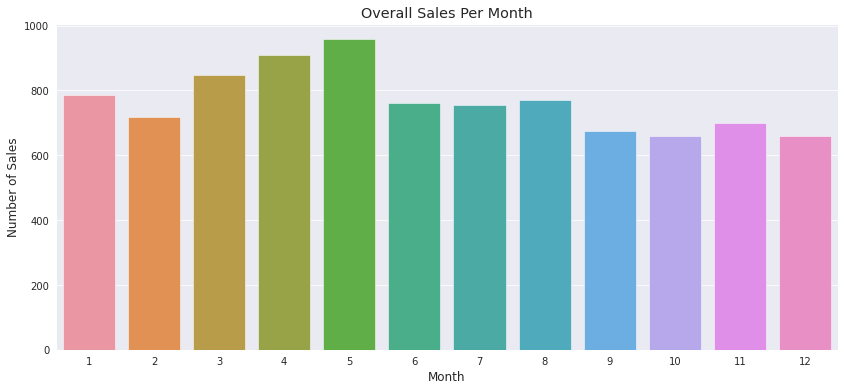

In [400]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Overall Sales Per Month')
sns.countplot(x='Month',data=df)
plt.ylabel('Number of Sales')

May appears to be the busiest month over the years

Text(0, 0.5, 'Number of Sales')

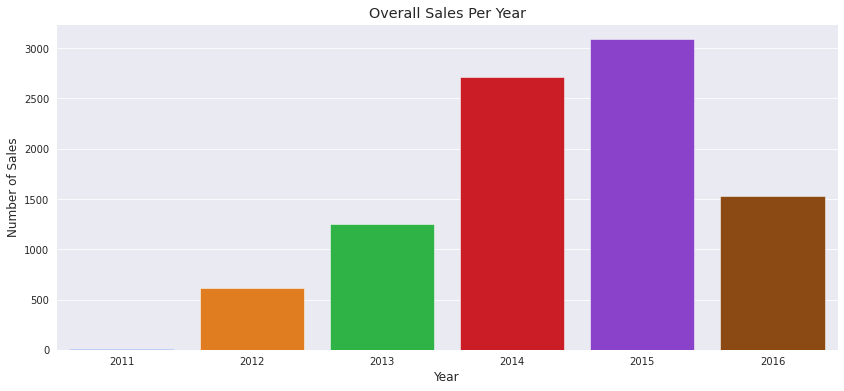

In [401]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Overall Sales Per Year')
sns.countplot(x='Year',data=df)
plt.ylabel('Number of Sales')

Lets now plot the overal sales per month for every product

Text(0, 0.5, 'Number of Sales')

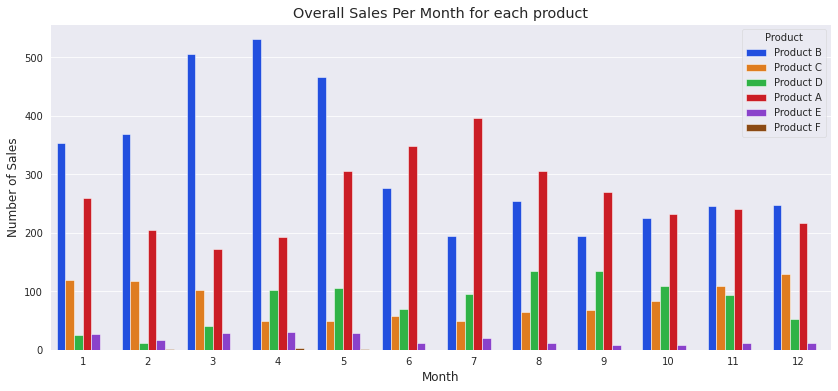

In [402]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Overall Sales Per Month for each product')
sns.countplot(x='Month',hue='Product',data=df)
plt.ylabel('Number of Sales')

Text(0, 0.5, 'Number of Sales')

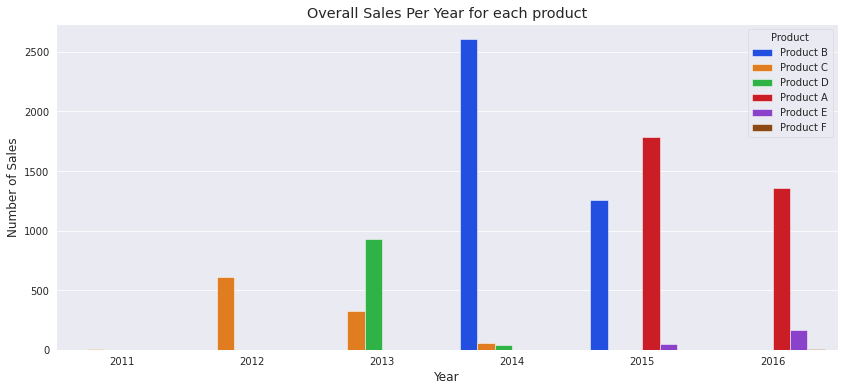

In [403]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Overall Sales Per Year for each product')
sns.countplot(x='Year',hue='Product',data=df)
plt.ylabel('Number of Sales')

Product C shows a decline in sales over the years , Product B and A are the most sold products

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization


We are going to look at the product category

In [404]:
df['Product'].value_counts()


Product B    3862
Product A    3141
Product C     999
Product D     975
Product E     213
Product F       5
Name: Product, dtype: int64

Text(0, 0.5, 'Total Price')

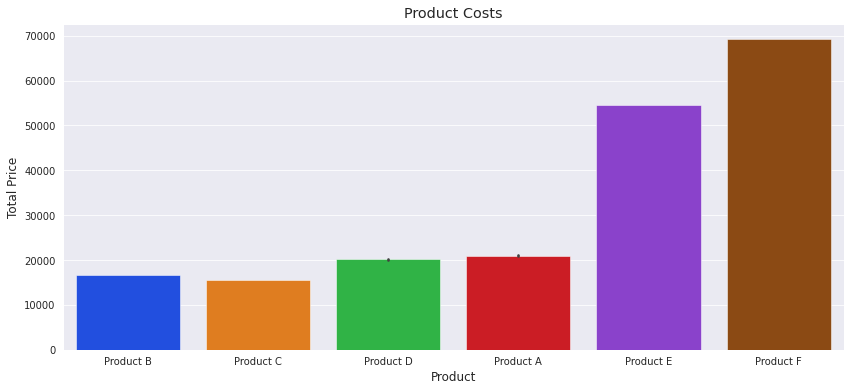

In [405]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.title('Product Costs')
sns.barplot(x='Product',y='TotalPrice',data=df)
plt.ylabel('Total Price')

Text(0.5, 0, 'Products')

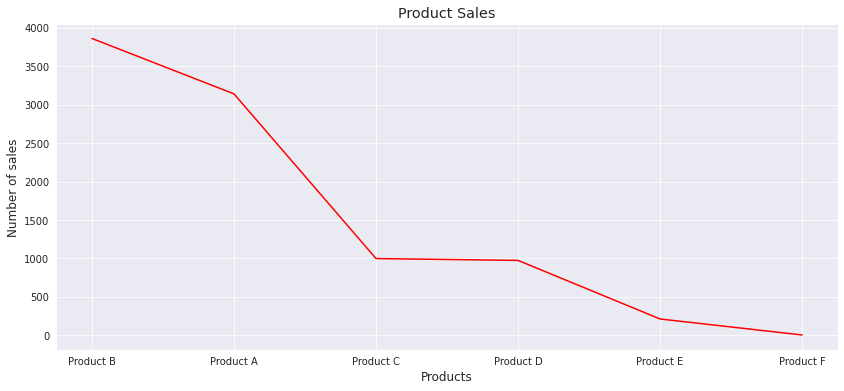

In [406]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.lineplot(data=df['Product'].value_counts(),color='r')
plt.title("Product Sales")
plt.ylabel('Number of sales')
plt.xlabel('Products')

Product B sold the most while F sold the least

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Product sales per Region and Location

We plot the top 5 and bottom 5 regional sales

In [407]:
# make a dataframe containing regional sales ordered in descending order
df2 = df.groupby('Region').Product.agg([len])
df2 = df2.reset_index()
df2 = df2.sort_values(by='len',ascending=False)
df2

,Region,len
14,Region 6,2934
11,Region 3,1941
10,Region 2,1364
0,Region 1,1232
15,Region 7,622
12,Region 4,588
13,Region 5,198
4,Region 13,62
16,Region 8,44
3,Region 12,39


Text(0, 0.5, 'Number of sales')

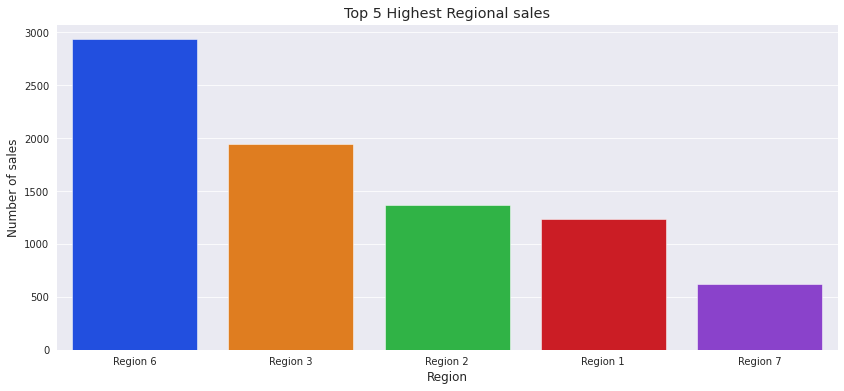

In [408]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.barplot(x='Region',y='len',data=df2[:5])
plt.title("Top 5 Highest Regional sales")
plt.ylabel('Number of sales')

Text(0, 0.5, 'Number of sales')

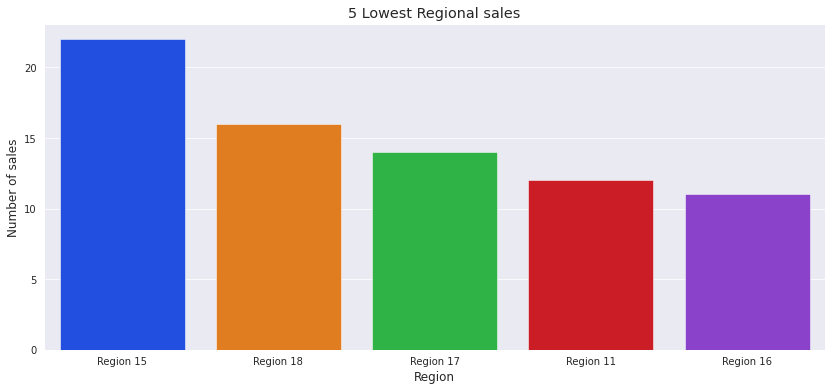

In [409]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.barplot(x='Region',y='len',data=df2.tail())
plt.title("5 Lowest Regional sales")
plt.ylabel('Number of sales')

Region 6 has the highest recorded sales of 2934 while region 16 has the lowest record of only 16


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



Lets analyse sales in Region 6

In [410]:
df3 = df.loc[(df['Region'] == 'Region 6')]
df3.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,Month,Year
count,2934.000000,2934.000000,2934.00000,2934.0,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000
mean,19322.213701,2331.799591,46.54908,365.0,3666.388207,4848.333674,15029.543286,6.306408,2014.414792
std,5903.694129,1406.446497,13.05571,0.0,2571.819724,2807.945263,6557.934226,3.370291,1.145441
min,15600.000000,1000.000000,40.00000,365.0,-3050.000000,-2870.000000,-2420.000000,1.000000,2011.000000
25%,16600.000000,2000.000000,40.00000,365.0,2500.000000,3450.000000,12051.000000,4.000000,2014.000000
50%,16600.000000,2000.000000,40.00000,365.0,3400.000000,4480.000000,15374.000000,6.000000,2015.000000
75%,20250.000000,2000.000000,50.00000,365.0,5100.000000,6200.000000,16713.500000,9.000000,2015.000000
max,69225.000000,9000.000000,165.00000,365.0,26001.000000,26001.000000,69225.000000,12.000000,2016.000000


Mean and median for paid amounts don't differ by much. This means the payment data is fairly uniform

Lets see the number of active and finished payments

Text(0.5, 0, 'Loan Status')

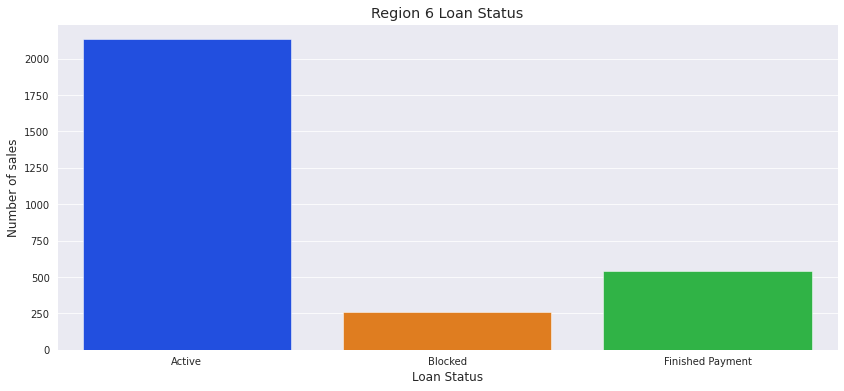

In [411]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.countplot(x='LoanStatus360',data=df3)
plt.title("Region 6 Loan Status")
plt.ylabel('Number of sales')
plt.xlabel('Loan Status')

In [412]:
df3['LoanStatus360'].value_counts()

Active              2133
Finished Payment     539
Blocked              262
Name: LoanStatus360, dtype: int64

Of the 2934 sales , 2133 are still active, 539 have finished paying while 262 have been blocked

Lets analyze loan status in all regions

Text(0.5, 0, 'Loan Status')

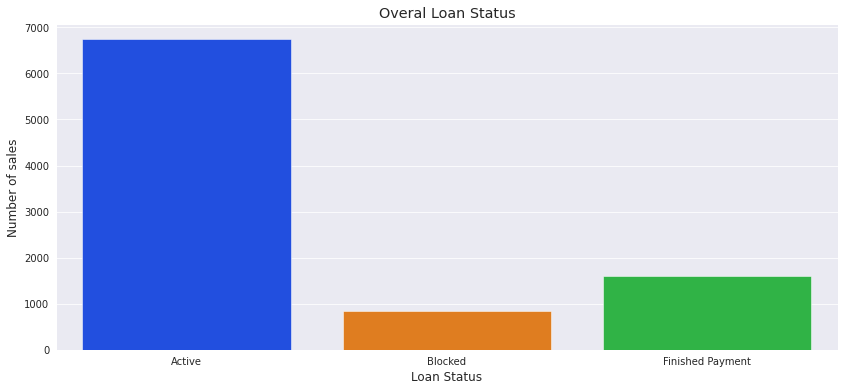

In [413]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.countplot(x='LoanStatus360',data=df)
plt.title("Overal Loan Status")
plt.ylabel('Number of sales')
plt.xlabel('Loan Status')

In [414]:
df['LoanStatus360'].value_counts()

Active              6742
Finished Payment    1604
Blocked              849
Name: LoanStatus360, dtype: int64

Out of 9195 , 1604 have finished payments which means only 17.44 % have completed payments

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Analaysis according to gender

In [415]:
df['CustomerGender'].value_counts()

Male            5358
Female          3290
NotSpecified     547
Name: CustomerGender, dtype: int64

In [416]:
df4 =  df['CustomerGender'].value_counts().values
df4

array([5358, 3290,  547])

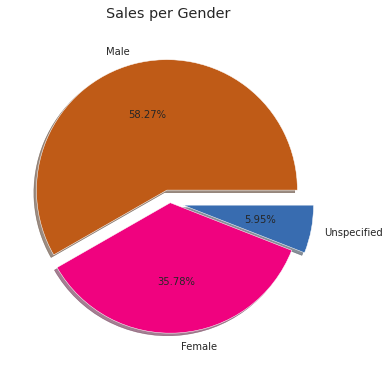

In [417]:
plt.figure(figsize=(6,6))
color = sns.set_palette('Accent_r')
plt.title('Sales per Gender \n')
plt.pie(df4 ,labels=['Male','Female','Unspecified'],autopct='%.2f%%',explode=[.1,0,.1],colors=color,shadow=True);

Males make up 58.27 % of consumers

Text(0, 0.5, 'Number of sales')

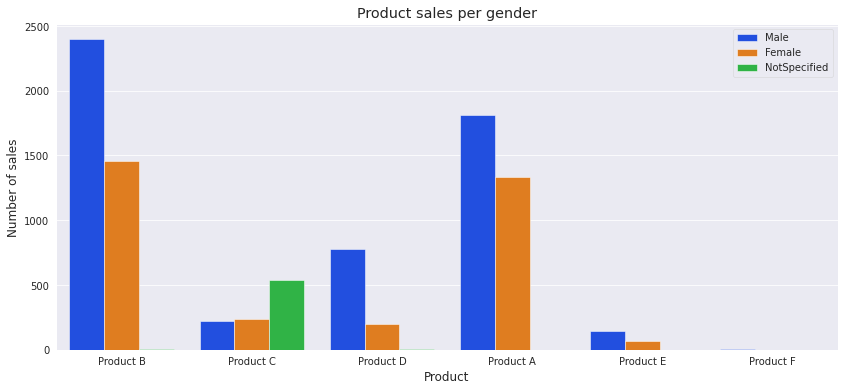

In [418]:
plt.figure(figsize=(14,6))
plt.title('Product sales per gender')
sns.set_style('darkgrid')
sns.set_palette('bright')
sns.countplot(x='Product',hue='CustomerGender',data=df)
plt.legend(loc='upper right')
plt.ylabel('Number of sales')

Product B has more male buyers while C has the least male buyers 

##### Lets check loan status according to gender

Text(0.5, 0, 'Gender')

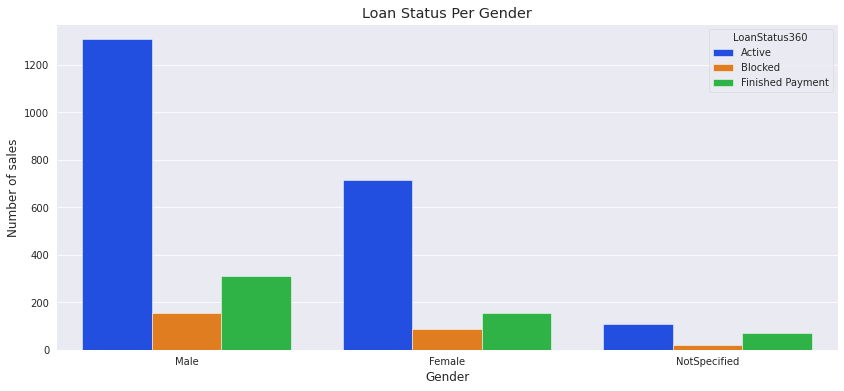

In [419]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.countplot(x='CustomerGender',hue='LoanStatus360',data=df3)
plt.title("Loan Status Per Gender")
plt.ylabel('Number of sales')
plt.xlabel('Gender')

Males have the highest numbers with finished payments while unspecified gender have a small difference between active and finished payments.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
